# MA model

r<sub>t</sub> = c + θ<sub>1</sub> * ε<sub>t - 1</sub> + ε<sub>t</sub>

r<sub>t</sub> - values of r in the current period

θ<sub>1</sub> - a numeric coefficient for the value associated with the 1s lag

ε<sub>t - 1</sub> - residuals for the current period

ε<sub>t</sub> - residuals for the past period

Start from the beginning of the data set and try to predict each value. Depending on how far we are time we get residual. We generate these residuals as we go through the set and create the epsilon variable.


MA(1) is almost equal to AR(infinite) with certain restrictions

Inverse relationship exists as well

|θ<sub>n</sub>| < 1

Absolute value of each coefficient should be less than 1 to prevent effect exploding in magnitude

MA model includes past residuals while the AR model includes past values

## Unexpected shocks from past periods

- autoregressive model need to adjust for shocks because they rely on past data

- there's a self correcting model that corrects itself immeadetely following the big error 

- more errors examined, more adapted model

- Moving Average model (MA) - absorbing these shocks allows the mean to move accordingly 

- They always adjust from error of the previous period

- Gives a model prediction a greater chance to move in similar direction of values it tries to predict

- Stops the model from greatly diverging

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
def LLR_test(mod_1, mod_2, DF=1): # models we want to compare and degrees of freedom
  L1 = mod_1.fit().llf
  L2 = mod_2.fit().llf
  LR = (2 * (L2 - L1))
  p = chi2.sf(LR, DF).round(3)
  return p

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Creating returns

In [7]:
df['returns'] = df.market_value.pct_change(1) * 100

### ACF for returns

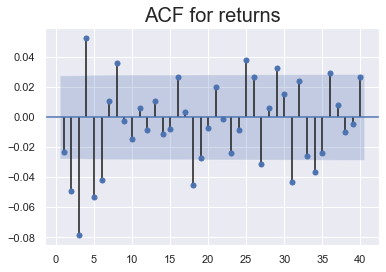

In [8]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title('ACF for returns', size=20)
plt.show()

## Fitting MA(1) model for returns

In [9]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0, 1)) # order for MA model has changed compared to AR model
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 23 Oct 2021   AIC                          15865.190
Time:                        22:05:47   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

## Fitting higher-lag models for returns

In [10]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0, 2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

# p-value is 0, which means MA(2) is a better predictor than MA(1)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 23 Oct 2021   AIC                          15853.728
Time:                        22:05:48   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [11]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0, 3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

# same as previous LLR test - MA(3) > MA(2)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 23 Oct 2021   AIC                          15818.634
Time:                        22:05:48   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [12]:
model_ret_ma_4 = ARMA(df.returns[1:], order=(0, 4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sat, 23 Oct 2021   AIC                          15809.547
Time:                        22:05:49   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [13]:
model_ret_ma_5 = ARMA(df.returns[1:], order=(0, 5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 23 Oct 2021   AIC                          15799.645
Time:                        22:05:51   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

In [14]:
model_ret_ma_6 = ARMA(df.returns[1:], order=(0, 6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 23 Oct 2021   AIC                          15794.442
Time:                        22:05:53   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [15]:
model_ret_ma_7 = ARMA(df.returns[1:], order=(0, 7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 23 Oct 2021   AIC                          15796.091
Time:                        22:05:58   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In [16]:
model_ret_ma_8 = ARMA(df.returns[1:], order=(0, 8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print('\nLLR test p-value = ' + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

# using MA(8) gives p-value 0.009 which suggest that MA(8) > MA(7)

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 23 Oct 2021   AIC                          15791.205
Time:                        22:06:03   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

In [17]:
# testing MA(8) against MA(6)
LLR_test(model_ret_ma_6, model_ret_ma_8, DF=2) # setting degrees of freedom to 2

# LLR test shows that MA(8) > MA(6)

0.027

## Residuals for returns

In [18]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [19]:
print('The mean of the residual is ' + str(round(df.res_ret_ma_8.mean(), 3)) + '\nThe variance of the residuals is ' + str(round(df.res_ret_ma_8.var(), 3)))

The mean of the residual is -0.0
The variance of the residuals is 1.356


In [20]:
from math import sqrt
round(sqrt(df.res_ret_ma_8.var()), 3) # finding standard deviation

# we estimate the standard deviation of residuals so that we can know how far off we can hypothetically be with our predictions

1.164

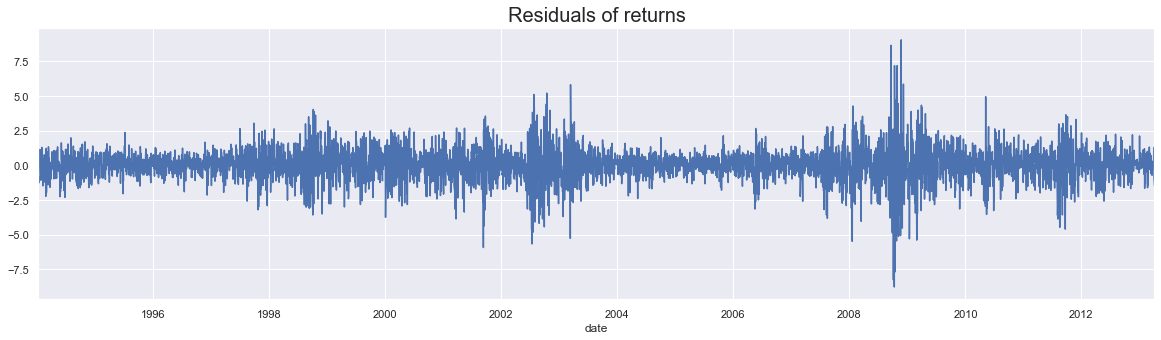

In [21]:
df.res_ret_ma_8[1:].plot(figsize=(20, 5))
plt.title('Residuals of returns', size=20)
plt.show()

In [22]:
sts.adfuller(df.res_ret_ma_8[2:])
# p-value is 0, the set is stationary

(-70.83581577944048,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052184895867)

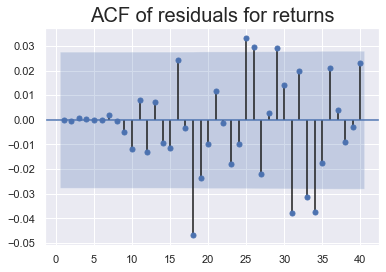

In [23]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero=False, lags=40)
plt.title('ACF of residuals for returns', size=20)
plt.show()

# markets adjust to shock, so values far in the past lose relevance

### Practice for MA(6) residuals

In [24]:
df['res_ret_ma_6'] = results_ret_ma_6.resid[1:]

In [25]:
print('The mean of the residual is ' + str(round(df.res_ret_ma_6.mean(), 3)) + '\nThe variance of the residuals is ' + str(round(df.res_ret_ma_6.var(), 3)))

The mean of the residual is -0.0
The variance of the residuals is 1.357


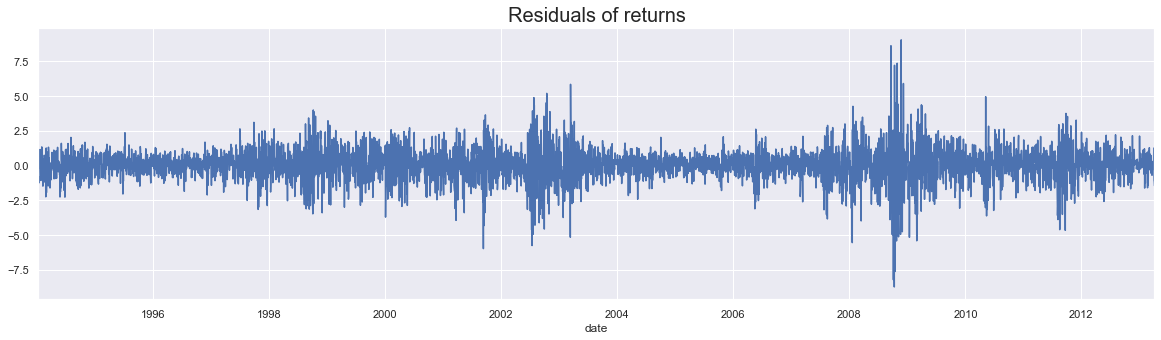

In [26]:
df.res_ret_ma_6[1:].plot(figsize=(20, 5))
plt.title('Residuals of returns', size=20)
plt.show()

In [27]:
sts.adfuller(df.res_ret_ma_6[2:])
# p-value is 0, the set is stationary

(-70.83995886006576,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15691.135289462061)

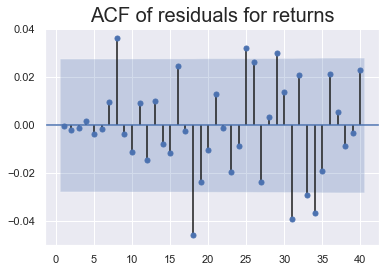

In [28]:
sgt.plot_acf(df.res_ret_ma_6[2:], zero=False, lags=40)
plt.title('ACF of residuals for returns', size=20)
plt.show()

# MA(8) is better because it covers lags up to 18-th

## Normalized returns

In [29]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

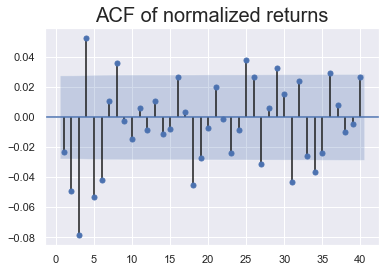

In [30]:
sgt.plot_acf(df.norm_ret[1:], zero=False, lags=40)
plt.title('ACF of normalized returns', size=20)
plt.show()

In [31]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order=(0, 8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()
# normalizing input data has no effect on model selection

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Sat, 23 Oct 2021   AIC                          80635.194
Time:                        22:11:31   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.846     -1.354      0.176     -29.310       5.364
ma.L1.norm_ret    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_ret    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norm_ret    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_ret     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_ret    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_ret    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norm_ret     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norm_ret     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [32]:
df['res_norm_ret_ma_8'] = results_norm_ret_ma_8.resid[1:]

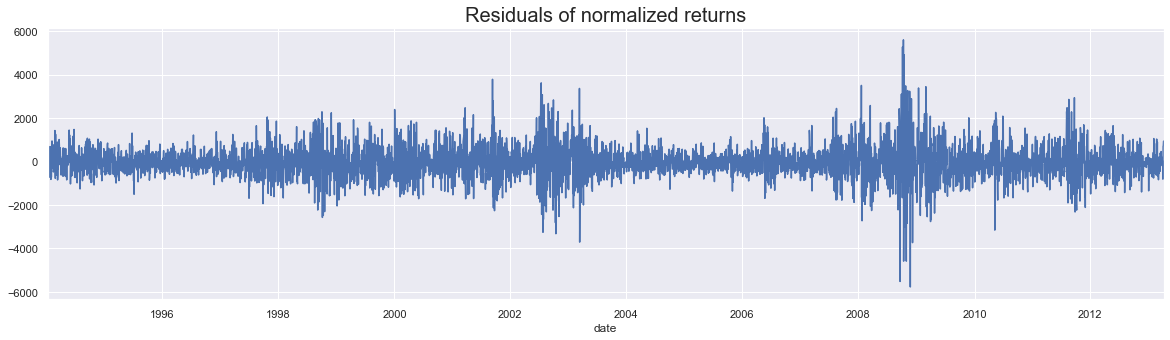

In [33]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title('Residuals of normalized returns', size=20)
plt.show()

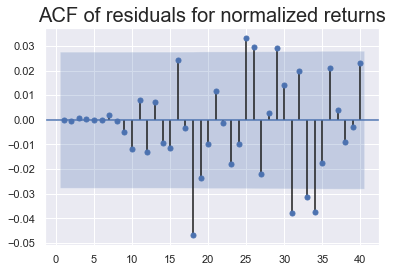

In [34]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero=False, lags=40)
plt.title('ACF of residuals for normalized returns', size=20)
plt.show()
# acf suggest that the data resembles white noise, so the model choice is supposedly good

## Fitting MA(1) model for prices



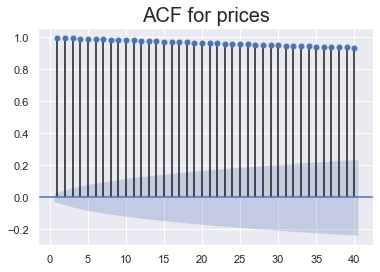

In [36]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title('ACF for prices', size=20)
plt.show()
# coefficients for all the lags seem significant
# any higher model would be preferred than lower model
# This seems that the infinite model would be the best but no such thing exist
# No moving average model would be a good estimator for prices

In [37]:
model_ma_1 = ARMA(df.market_value, order=(0, 1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Sat, 23 Oct 2021   AIC                          77264.000
Time:                        22:16:36   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5909     14.660    347.187      0.000    5060.859    5118.323
ma.L1.market_value     0.9573      0.003    335.560      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

MA models do not perform well for non-stationary data

When the ACF coefficients don't seem to die off, we should use a model with an AR component.

## Past values and past mistakes

Neither AR nor MA models predict perfectly.

AR: failed to adjust quickly to unexpected shocks

MA: needed a baseline, we can use previous values to provide that


ARMA model solves the issues each one has individually 